#**SUPERVISED LEARNING ALGORITHM: KNeighbor Clustering**

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [3]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking for null values

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

checking for duplicates

In [5]:
df.duplicated().sum()

0

statistics for numberic features

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Infromation overview of the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


checking for the unique value count for species column

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Using Label encoding to encode Species column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
#checking for value count after encoding
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

##*Splitting data into features and target for train and test*

In [12]:
#splitting
x=df.drop('Species',axis=1)
y=df['Species']

*Train and test*

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

##*Model Training with KNeighbor algorithm*

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

#fit model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
#predict the model using the trained data(x_test)
y_pred = knn.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Model score for both the training data and test data

In [22]:
knn.score(x_train,y_train)

1.0

In [23]:
accuracyscore = knn.score(x_test,y_test)
accuracyscore

1.0

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



From the above model evaluation both the training data and test result shows our score is 100% which makes the model overfit.

#**UNSUPERVISED: K-Means Clustering**

Load Data

In [29]:
iris2 = pd.read_csv('/content/Iris.csv')
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
x = iris2
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


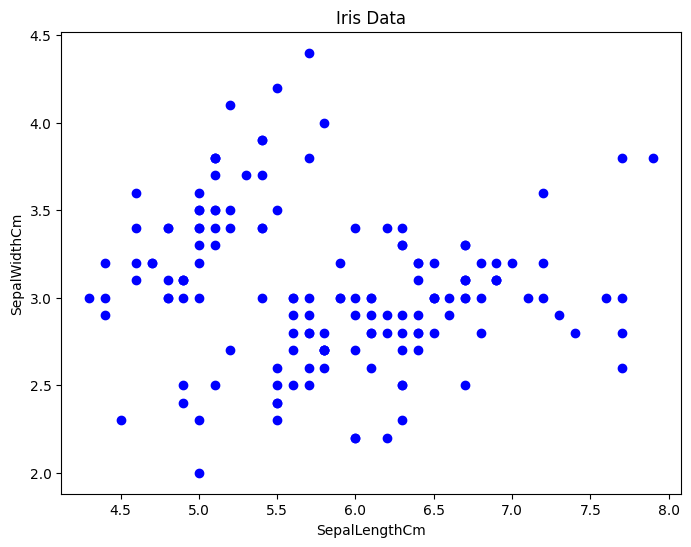

In [27]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points
ax.scatter(x['SepalLengthCm'],x['SepalWidthCm'], color= 'blue')

# Add labels
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')

#title
ax.set_title('Iris Data')

plt.show()

In [31]:
# Features
x1 = iris2[['SepalLengthCm','SepalWidthCm']]
x1

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## **K-MEANS Algorithm**##

Import libraries from sci-kit Learn

In [34]:
# Import
from sklearn.cluster import KMeans


# Create a KMeans object
model_1 = KMeans(n_clusters=3, n_init = 'auto')

# Apply K-means clustering
model_1.fit(x1)

KMeans(n_clusters=3, n_init='auto')

In [35]:
# Add cluster labels to the DataFrame
iris2['Cluster'] = model_1.labels_
iris2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [36]:
# Apply k-means clustering
model_1 = KMeans(n_clusters=5, random_state=42, n_init='auto')
labels = model_1.fit_predict(x1)
labels

array([3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3,
       3, 2, 3, 2, 3, 2, 0, 4, 0, 1, 4, 1, 4, 2, 4, 2, 1, 1, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 4, 1, 2, 1, 1, 1, 4, 2, 1, 4, 1, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 1, 1, 4, 4, 0, 0, 1, 0, 1, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0,
       4, 4, 1, 0, 4, 4, 1, 0, 4, 0, 1, 4, 4, 4, 4, 4, 4, 1], dtype=int32)

In [38]:
centroids = model_1.cluster_centers_
centroids

array([[7.31176471, 3.12941176],
       [5.76315789, 2.67894737],
       [4.79354839, 3.04193548],
       [5.28333333, 3.70833333],
       [6.445     , 2.995     ]])

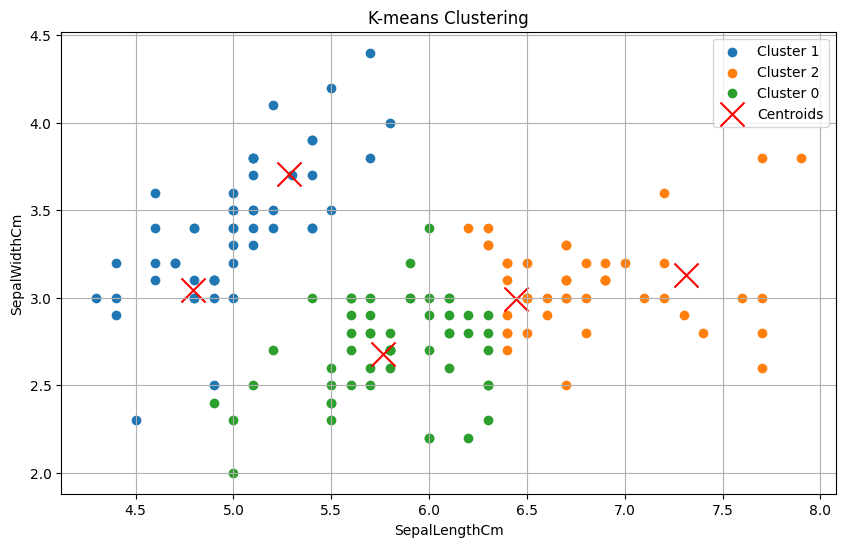

In [40]:
# Plot the clusters

plt.figure(figsize=(10, 6))
for cluster_label in iris2['Cluster'].unique():
    cluster_data = iris2[iris2['Cluster'] == cluster_label]
    plt.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], label=f'Cluster {cluster_label}')
plt.scatter(model_1.cluster_centers_[:, 0], model_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.grid(True)
plt.show()